# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,recall_score ,accuracy_score,precision_score, roc_auc_score

# Loading Data

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/Bank Customer Churn Prediction.csv")

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Display statistical summary
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exploratory Data Analysis(EDA)

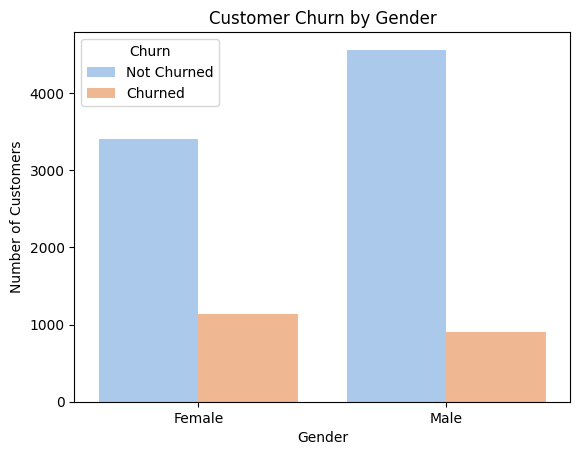

In [ ]:
#Customer churn by gender
sns.countplot(x='gender', hue='churn', data=df, palette='pastel')
plt.title('Customer Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

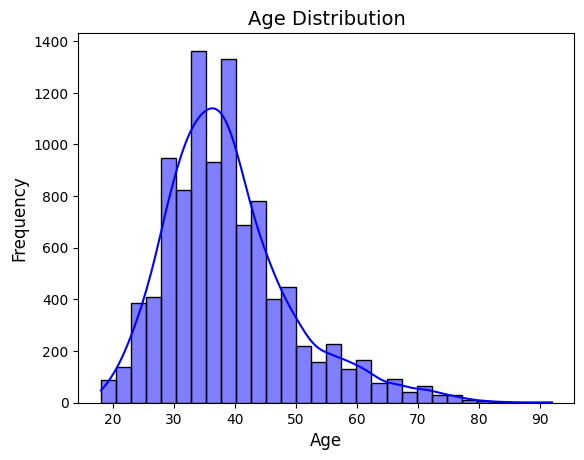

In [ ]:
#Age distribution
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

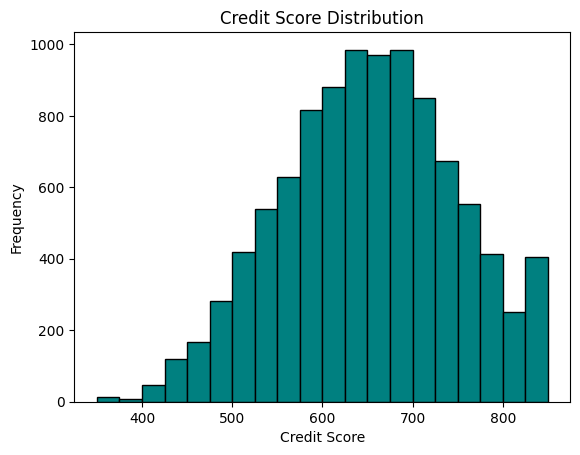

In [ ]:
plt.hist(df["credit_score"], bins=20, color="teal", edgecolor="black")
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

<ipython-input-116-28a31ccfbbd1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='pastel')


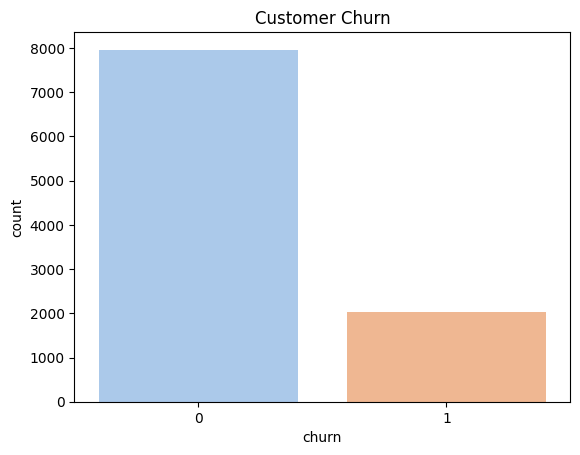

In [ ]:
sns.countplot(x='churn', data=df, palette='pastel')
plt.title('Customer Churn')
plt.show()

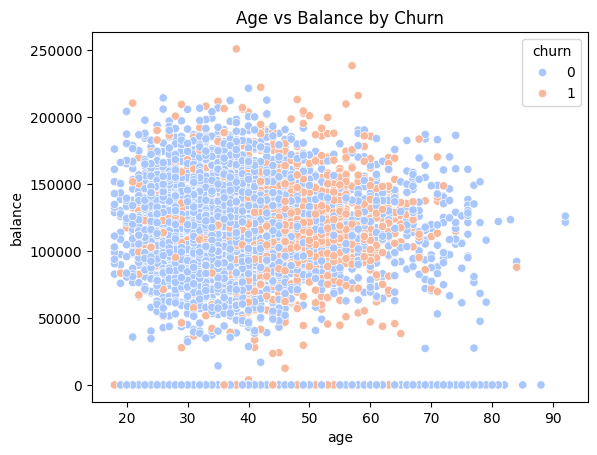

In [ ]:
sns.scatterplot(data=df, x="age", y="balance", hue="churn", palette="coolwarm")
plt.title("Age vs Balance by Churn")
plt.show()

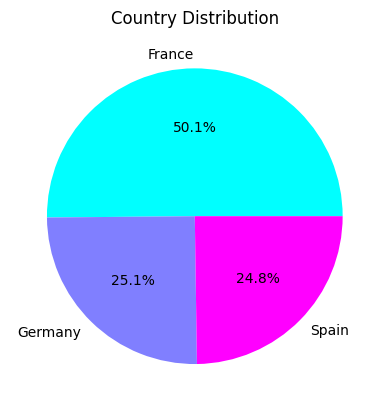

In [ ]:
df["country"].value_counts().plot.pie(autopct="%1.1f%%", cmap="cool")
plt.title("Country Distribution")
plt.ylabel("")
plt.show()

<ipython-input-119-fe09c11426f7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='age', data=df, palette='pastel')


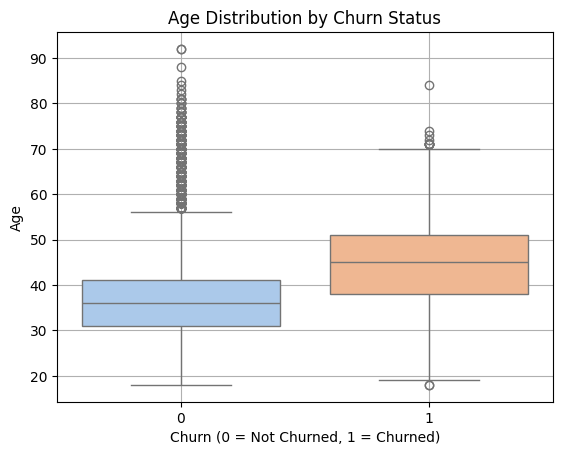

In [ ]:
sns.boxplot(x='churn', y='age', data=df, palette='pastel')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
plt.ylabel('Age')
plt.grid()
plt.show()

<ipython-input-120-b99d644e90cf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="active_member", y="credit_score", palette="cool")


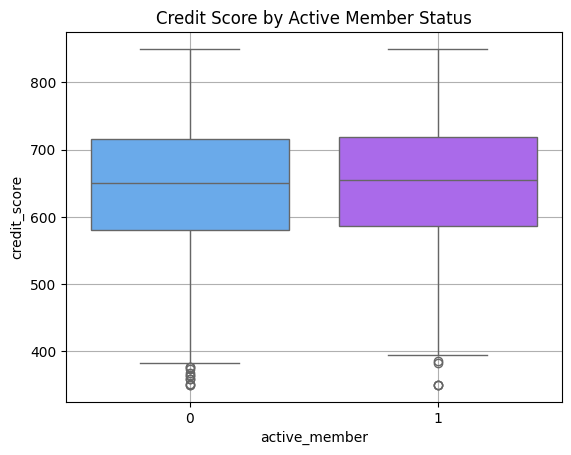

In [ ]:
sns.boxplot(data=df, x="active_member", y="credit_score", palette="cool")
plt.title("Credit Score by Active Member Status")
plt.grid()
plt.show()

<ipython-input-121-7c6ef145feaa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='products_number', y='churn', data=churn_rate_by_products, palette='pastel')


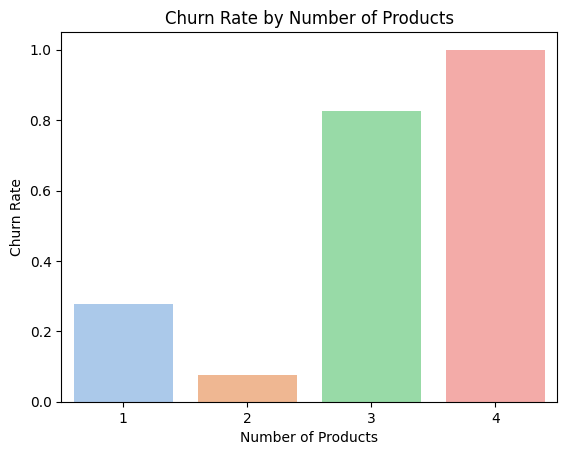

In [ ]:
churn_rate_by_products = df.groupby('products_number')['churn'].mean().reset_index()
plt.figure()
sns.barplot(x='products_number', y='churn', data=churn_rate_by_products, palette='pastel')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of Products')
plt.show()

<ipython-input-122-4c9376ac8d57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='active_member', y='churn', data=churn_rate,palette='pastel')


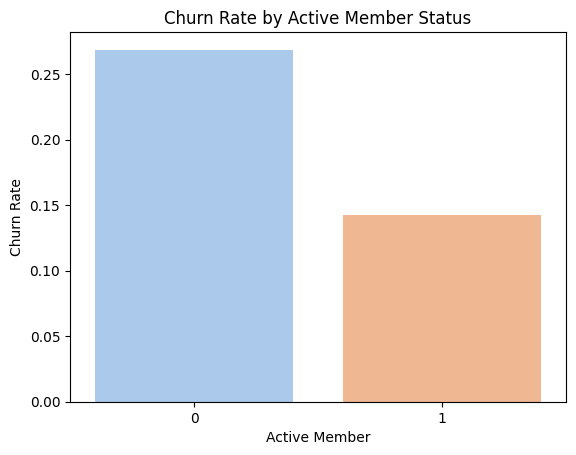

In [ ]:
churn_rate = df.groupby('active_member')['churn'].mean().reset_index()
sns.barplot(x='active_member', y='churn', data=churn_rate,palette='pastel')
plt.xlabel('Active Member')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Active Member Status')
plt.show()

<ipython-input-123-c81bd32b85fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate, x="gender", y="churn", palette="magma")


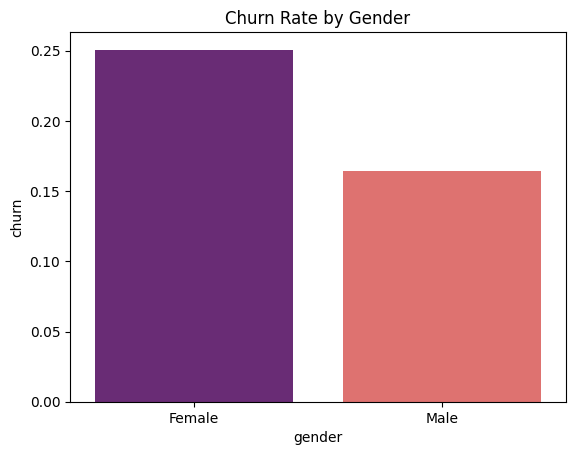

In [ ]:
churn_rate = df.groupby("gender")["churn"].mean().reset_index()
sns.barplot(data=churn_rate, x="gender", y="churn", palette="magma")
plt.title("Churn Rate by Gender")
plt.show()

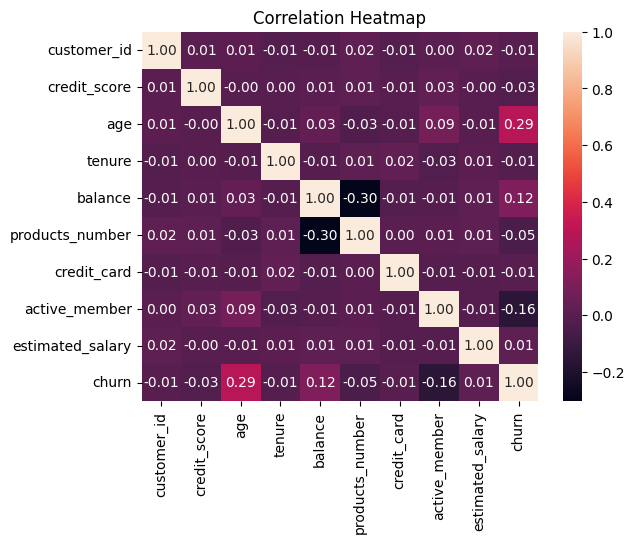

In [ ]:
#correlation Map
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [ ]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])
df['gender'] = label_encoder.fit_transform(df['gender'])

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


*Removing the customer_id column because it has no impact on the data.*

In [ ]:
df.drop(columns=['customer_id'], inplace=True)
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

# Model Building

In [ ]:
X = df.drop('churn', axis=1)
y = df['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 10), (2500, 10), (7500,), (2500,))

In [ ]:
from sklearn.preprocessing import StandardScaler # Importing the StandardScaler class
transform = StandardScaler()
X_train = transform.fit_transform(X_train) # Applying the transformation to the training data
X_test = transform.transform(X_test)

In [ ]:
X_train

array([[-0.73550706,  0.31266104, -1.08726059, ..., -1.55362351,
        -1.03446007, -1.64080994],
       [ 1.02442719, -0.89235324, -1.08726059, ...,  0.64365658,
        -1.03446007, -0.07927152],
       [ 0.80829492,  1.51767532, -1.08726059, ...,  0.64365658,
         0.96668786, -0.99684012],
       ...,
       [ 0.90092304, -0.89235324,  0.91974271, ...,  0.64365658,
        -1.03446007,  1.4133552 ],
       [-0.62229491,  1.51767532, -1.08726059, ...,  0.64365658,
         0.96668786,  0.84496184],
       [-0.28265848,  0.31266104, -1.08726059, ...,  0.64365658,
        -1.03446007,  0.32500428]])

In [ ]:
X_test

array([[-0.55025082,  0.31266104, -1.08726059, ...,  0.64365658,
         0.96668786,  1.61203027],
       [-1.31185979, -0.89235324, -1.08726059, ...,  0.64365658,
        -1.03446007,  0.49626891],
       [ 0.57157862,  1.51767532, -1.08726059, ...,  0.64365658,
         0.96668786, -0.42502785],
       ...,
       [ 1.95070838, -0.89235324, -1.08726059, ...,  0.64365658,
        -1.03446007, -0.272747  ],
       [ 0.29369426,  0.31266104,  0.91974271, ...,  0.64365658,
        -1.03446007, -0.93306558],
       [ 0.870047  , -0.89235324,  0.91974271, ..., -1.55362351,
        -1.03446007, -0.47380732]])

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

In [ ]:
LR.fit(X_train, y_train)
# Make predictions
y_pred_LR = LR.predict(X_test)

In [ ]:
X_test = transform.transform(X_test)
y_pred_LR = LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_LR

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print('MAE:', mean_absolute_error(y_test, y_pred_LR))
print('MSE:', mean_squared_error(y_test, y_pred_LR))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_LR)))

MAE: 0.2036
MSE: 0.2036
RMSE: 0.45122056690713913


In [ ]:
score=r2_score(y_test,y_pred_LR)
print(score)

-0.25565042692114526


In [ ]:
#Adjusted R^2 score
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-0.2606952257436488

In [ ]:
accuracy = accuracy_score(y_test, y_pred_LR)

In [ ]:
accuracy

0.7964